<a href="https://colab.research.google.com/github/victoriapaganotto/shepy/blob/main/Aula_7_shePY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 7 - shePY
### **Regressão Linear**

#### **Aula ministrada pelo Prof. Frederico Kremer**
O resultado de uma regressão linear é uma equação que minimiza alguma função de erro, com  **soma do erro quadrático** *(sum of squared,* SSE) e a **raiz quadrática média** (*root mean square error*, RMSE).

$y = b + a * x$

**Soma do erro quadrático** (*sum of squared errors*):

$SSE = \Sigma_{i=1}^{n}{\Big(y^{pred}_i - y_i\Big)^2}$

**Raiz da média do erro quadrático** (*root mean squared error*).

$RMSE = \sqrt{\frac{\Sigma_{i=1}^{n}{\Big(y^{pred}_i - y_i\Big)^2}}{n}}$

A identificação dos melhores valores de *b* e *a* é um problema de otimização clássico, e diferentes estratégias podem ser utilizadas para isso. Uma abordagem simples para esse problema é a de **mínimos quadrádos ordinários** (*ordinary least squares*), muito utilizada em estatística clássica. Esse método exige que exista uma distribuição normal nos dados e ausência de co-linearidade. O ajuste dos parâmetros é feito com base na **derivada parcial de erro** de forma **não-iterativa**.

![](https://cnx.org/resources/33dd2f2308d09aa6422b056cdf466692a1351722)

Outra abordagem é denominada **descida de gradiente** ou *gradient descent*, que consiste em um processo **iterativo** de otimização dos valores a partir da **derivada parcial do erro**.

![](http://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

Para entender isso, imagine que estamos tentando ajustar *a* e *b* gradualmente, com pequenos *steps*, onde iremos aumentar ou diminuir esses parâmetros de forma proporcional ao impacto que esses tem no erro. Dessa forma, os ajustes são proporcionais ao erro, ponderamos por um valor chamado **tacha de aprendizagem** (*learning rate*), geralmente abreviado pela letra grega %\alpha%.
Essa abordagem de otimização é também utilizada por outros modelos de aprendizagem de máquinas, com as **redes neurais**, onde há não-linearidade e co-linearidade.





## **Exemplo de regressão univariada**
A forma mais simples de regressão e a univariada, quando há apenas uma **variável explicativa** e uma **variável de desfecho**. No contexto de aprendizado de máquina é comum se utilizar os termos **atributo** (*feature*) e **rótulo** (*labels*) para se referir, respectivamente, às mesmas coisas.


In [3]:
# Biblioteca skleran
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression  

In [4]:
# Variável chamada 'data'
# Dataset 'toyproblem'
data = load_diabetes()

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

In [6]:
df.corr # Dados que passaram por uma transformação estatística

<bound method DataFrame.corr of           age       sex       bmi  ...        s5        s6  target
0    0.038076  0.050680  0.061696  ...  0.019908 -0.017646   151.0
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204    75.0
2    0.085299  0.050680  0.044451  ...  0.002864 -0.025930   141.0
3   -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362   206.0
4    0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641   135.0
..        ...       ...       ...  ...       ...       ...     ...
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207   178.0
438 -0.005515  0.050680 -0.015906  ... -0.018118  0.044485   104.0
439  0.041708  0.050680 -0.015906  ... -0.046879  0.015491   132.0
440 -0.045472 -0.044642  0.039062  ...  0.044528 -0.025930   220.0
441 -0.045472 -0.044642 -0.073030  ... -0.004220  0.003064    57.0

[442 rows x 11 columns]>

In [7]:
data

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [8]:
df.corr()

age       sex       bmi  ...        s5        s6    target
age     1.000000  0.173737  0.185085  ...  0.270777  0.301731  0.187889
sex     0.173737  1.000000  0.088161  ...  0.149918  0.208133  0.043062
bmi     0.185085  0.088161  1.000000  ...  0.446159  0.388680  0.586450
bp      0.335427  0.241013  0.395415  ...  0.393478  0.390429  0.441484
s1      0.260061  0.035277  0.249777  ...  0.515501  0.325717  0.212022
s2      0.219243  0.142637  0.261170  ...  0.318353  0.290600  0.174054
s3     -0.075181 -0.379090 -0.366811  ... -0.398577 -0.273697 -0.394789
s4      0.203841  0.332115  0.413807  ...  0.617857  0.417212  0.430453
s5      0.270777  0.149918  0.446159  ...  1.000000  0.464670  0.565883
s6      0.301731  0.208133  0.388680  ...  0.464670  1.000000  0.382483
target  0.187889  0.043062  0.586450  ...  0.565883  0.382483  1.000000

[11 rows x 11 columns]

In [9]:
x = df[['bmi']]
y = df['target']

In [10]:
x

bmi
0    0.061696
1   -0.051474
2    0.044451
3   -0.011595
4   -0.036385
..        ...
437  0.019662
438 -0.015906
439 -0.015906
440  0.039062
441 -0.073030

[442 rows x 1 columns]

In [11]:
from matplotlib import pyplot as plt

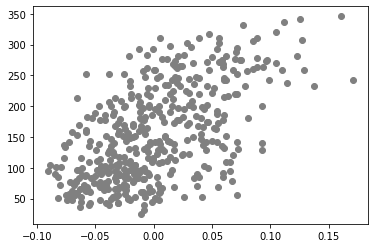

In [13]:

plt.scatter(x, y, color='gray')

In [14]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model.coef_

array([949.43526038])

In [16]:
model.intercept_

152.1334841628967

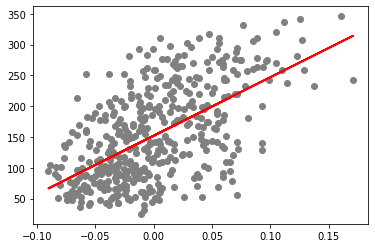

In [18]:
y_pred = model.predict(x)

plt.scatter(x, y, color = 'gray')
plt.plot(x, y_pred, color ='red', linewidth=2) # Predição 

## **Exemplo de regressão multivariada**
Para uma regressão multivariada, com *i* variáveis, *x* vetor que armazenará multiplos valores, e *a* será um vetor de pesos. Por conta disso, a equação da reta será resultado da soma ponderada dos valores de *x* pelos pesos *a*, acrescentando-se posteriormente o *b*.

$y = b + (\sum_{i=1}^n{a_i x_i})$

Em estatística, as **variáveis explicativas** de um modelo multivariado são também denomiandos **variáveis independentes**, visto que devem ser independentes entre si, mas dependentes da **desfecho**. Quando isso não ocorre, dizemos que o modelo possui **co-linearidade**, e isso pode ser um problema em alguns casos.

**Importante!** mas geralmente estatísticos se preocupam mais com isso que engenheiros de *machine learning*.


## Duas variáveis;

In [19]:
x = df [['bmi', 'age']]

In [20]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_

array([924.81645876, 133.01372901])

In [22]:
model.intercept_

152.13348416289674

## Todas as variáveis:

In [23]:
x = df.drop(['target'], axis = 1)

In [24]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [26]:
model.intercept_

152.1334841628965

## **Métricas para avaliar modelos de regressão**
Multiplas métricas podem ser utilizadas para a avaliação dos modelos de regressão, sendo algumas destas, utilizadas inclusive como função do erro (ex: RMSE). Além disso é possível também se utilizar métricas de estatística, como a de *Pearson* e de *Spearman* para analisar a correção entre o valor previsto e real da variável de interesse, ou o coeficiente de determinação.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [29]:
mean_squared_error(y, y_pred)

3890.4565854612724

In [30]:
mean_absolute_error(y, y_pred)

51.798627639533656

In [32]:
r2_score(y, y_pred)

0.3439237602253803

In [33]:
pearsonr(y, y_pred)

(0.5864501344746887, 3.4660064451654114e-42)

In [34]:
spearmanr(y, y_pred)

SpearmanrResult(correlation=0.5613820101065616, pvalue=4.567023927725032e-38)

In [35]:
# Importante, evitar "overfitting"
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = model.predict(x_test)

In [41]:
mean_squared_error(y_test, y_pred)

3119.445836517435

In [42]:
mean_absolute_error(y_test, y_pred)

45.930597499741204

In [43]:
r2_score(y_test, y_pred)

0.44267957930401314

In [44]:
pearsonr(y_test,y_pred)

(0.6814047435474352, 1.8625238684815115e-16)

In [45]:
spearmanr(y_test, y_pred)

SpearmanrResult(correlation=0.6634709267024249, pvalue=2.1068126477531205e-15)

## **Cuidado na criação de modelos lineares!**
1. As variáveis usadas como features (*x*) sejam independentes entre si, ou seja, que exista pouca co-linearidade entre elas.
2. A distribuição dos dados é linear ou se há interações não-lineares (isso pode ser visto na análise exploratória).
3. Não devem haver *outliers*(isso também pode ser visto na análise exploratória). É possível se reduzir o efeito de *outliers* com o uso de métodos de regularização.
4. A distribução dos dados dever ser normal.
5. Não explore (muito) além do limite dos dados que foram utilizados para o treino do modelo.

![](https://conteudo.imguol.com.br/blogs/225/files/2019/06/giphy-12.gif)